In [1]:
import cptac
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics

In [2]:
from scipy import stats

In [3]:
def get_gene_list(tissue):
    #Returns a list of the genes that are in both proteomics and transcriptomics
    gene_list = []
    prot = tissue.get_proteomics()
    if isinstance(prot.columns, pd.MultiIndex):
        prot = prot.columns.get_level_values(0)
    trans = tissue.get_transcriptomics()
    if isinstance(trans.columns, pd.MultiIndex):
        trans = trans.columns.get_level_values(0)
    for i in prot:
        if i in trans and i not in gene_list:
            gene_list.append(i)
    return gene_list

In [4]:
def slope_and_r(cancers, gene_lists, valid_sample_number = 30, tissue_type = "both"):
    #Returns a list of lists containing the name of the gene and the correlation
    slope_list = []
    r_squared_list = []
    gene_list_counter = 0
    for tissue in cancers:
        gene_list = gene_lists[gene_list_counter]
        prot = tissue.get_proteomics(tissue_type)
        if isinstance(prot.columns, pd.MultiIndex):
            prot = cptac.utils.reduce_multiindex(prot, levels_to_drop = "Database_ID")

        trans = tissue.get_transcriptomics(tissue_type)
        if isinstance(trans.columns, pd.MultiIndex):
            trans = cptac.utils.reduce_multiindex(trans, levels_to_drop = "Database_ID")

        prot_index_values = list(prot.index.values)
        trans_index_values = list(trans.index.values)


        for found_index in prot_index_values:
            if found_index not in trans_index_values:
                prot = prot.drop(index=found_index)
        for found_index in trans_index_values:
            if found_index not in prot_index_values:
                trans = trans.drop(index=found_index)

        for gene in gene_list:
            prot_measurements = prot[gene]
            prot_count = len(prot_measurements.dropna())

            trans_measurements = trans[gene]
            trans_count = len(trans_measurements.dropna())

            if prot_count < valid_sample_number or trans_count < valid_sample_number:
                continue

            nan_indices = set()
            prot_indices = list(prot_measurements.index.values)
            trans_indices = list(trans_measurements.index.values)

            #Here we are only currently taking the first column of multi_indices
            if isinstance(prot_measurements, pd.core.frame.DataFrame): 
                prot_measurements = prot_measurements.iloc[:,0]
            if isinstance(trans_measurements, pd.core.frame.DataFrame):
                trans_measurements = trans_measurements.iloc[:,0]
            for i in range(len(prot_measurements)):
                if math.isnan(prot_measurements[i]):
                    nan_indices.add(prot_indices[i])

            for i in range(len(trans_measurements)):
                if math.isnan(trans_measurements[i]):
                    nan_indices.add(trans_indices[i])

            nan_indices = list(nan_indices)
            prot_measurements = prot_measurements.drop(nan_indices)
            trans_measurements = trans_measurements.drop(nan_indices)

            slope, intercept, r_value, p_value, std_err = stats.linregress(prot_measurements, trans_measurements)
    #         correlation,pval = scipy.stats.pearsonr(prot_measurements, trans_measurements)
#             if slope > 10000:
#                 print("gene = ",gene)
#                 print("slope = ",slope)
#                 print("index = ",gene_list_counter)
            if math.isnan(r_value):
                continue
            slope_list.append(slope)
            r_squared_list.append(r_value ** 2)
        gene_list_counter += 1
    return slope_list, r_squared_list

In [5]:
def ret_list(li):
    #Returns a list of correlations from all genes
    ret_li = []
    for i in li:
        ret_li.append(i[1])   
    return ret_li

In [6]:
# cptac.download("brca")
# cptac.download("ccrcc")
# cptac.download("colon")
# cptac.download("endometrial")
# cptac.download("gbm")
# cptac.download("luad")
# cptac.download("ovarian")
# cptac.download("hnscc")
# cptac.download("lscc")
brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
colon = cptac.Colon()
en = cptac.Endometrial()
gbm = cptac.Gbm()
luad = cptac.Luad()
ovarian = cptac.Ovarian()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 14)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 15)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 17)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 18)


In [7]:
brca_gene_list = get_gene_list(brca)
ccrcc_gene_list = get_gene_list(ccrcc)
colon_gene_list = get_gene_list(colon)
gbm_gene_list = get_gene_list(gbm)
luad_gene_list = get_gene_list(luad)
ovarian_gene_list = get_gene_list(ovarian)
en_gene_list = get_gene_list(en)
hnscc_gene_list = get_gene_list(hnscc)
lscc_gene_list = get_gene_list(lscc)

In [13]:
gene_lists = [luad_gene_list]
cancers = [luad]
# gene_lists = [brca_gene_list,ccrcc_gene_list,colon_gene_list,
#               luad_gene_list,ovarian_gene_list,
#              en_gene_list,hnscc_gene_list,lscc_gene_list]
# cancers = [brca,ccrcc,colon,luad,ovarian,en,hnscc,lscc]

In [14]:
slope_list,r_squared_list = slope_and_r(cancers, gene_lists)

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


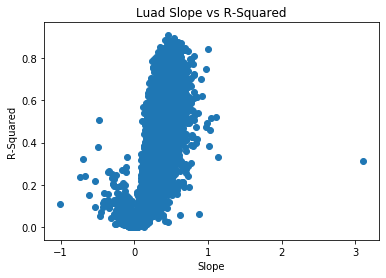

In [15]:
plt.scatter(slope_list, r_squared_list)
ax = plt.gca()
ax.set_xlabel("Slope")
ax.set_ylabel("R-Squared")
ax.set_title("Luad Slope vs R-Squared")
# ax.set_xlim([-10,10])
plt.show()

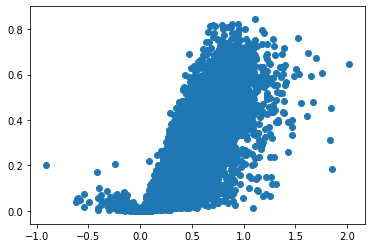

In [62]:
plt.scatter(slope_list, r_squared_list)
ax = plt.gca()
# ax.set_xlim([-10,10])
plt.show()

In [22]:
print(len(slope_list))

86564


In [12]:
brca_slope, brca_r_squared = correlation_list(brca, brca_gene_list, tissue_type = "both")
# ccrcc_corr, ccrcc_pval = correlation_list(ccrcc, ccrcc_gene_list, tissue_type = "both")
# colon_corr, colon_pval = correlation_list(colon, colon_gene_list, tissue_type = "both")
# en_corr, en_pval = correlation_list(en, en_gene_list, tissue_type = "both")
# gbm_corr, gbm_pval = correlation_list(gbm, gbm_gene_list, tissue_type = "both")
# luad_corr, luad_pval = correlation_list(luad,luad_gene_list, tissue_type = "both")
# ovarian_corr, ovarian_pval = correlation_list(ovarian, ovarian_gene_list, tissue_type = "both")
# hnscc_corr, hnscc_pval = correlation_list(hnscc, hnscc_gene_list, tissue_type = "both")
# lscc_corr, lscc_pval = correlation_list(lscc, lscc_gene_list, tissue_type = "both")

cptac warning: Due to dropping the specified levels, dataframe now has 655 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


In [15]:
# brca_r_squared

In [8]:
genes = brca_gene_list + ccrcc_gene_list + colon_gene_list + en_gene_list + gbm_gene_list+ luad_gene_list + ovarian_gene_list + hnscc_gene_list + lscc_gene_list
common_genes = []
for i in genes:
    if i not in common_genes:
        common_genes.append(i)
common_genes = sorted(common_genes)

In [9]:
# for item in brca_corr:
#     if item[0] == "RGMA":
#         print("Here:")
#         print(item[1])

In [10]:
# for item in brca_corr:
#     print(item)

In [11]:
def fill_genes_nan(all_genes, tissue_corr):
    tissue_genes = []
    for i, j  in tissue_corr:
        tissue_genes.append(i)
        
    for i in all_genes:
        if i not in tissue_genes:
            tissue_corr.append([i, np.nan])
    end_list = sorted(tissue_corr)
           
    return end_list

In [12]:
# brca_list_1 = fill_genes_nan(common_genes, brca_corr)
# ccrcc_list_1 = fill_genes_nan(common_genes, ccrcc_corr)

In [13]:
# print(brca_list_1[13478])
# print(ccrcc_list_1[13478])
# print(brca_list_1[10379])
# print(ccrcc_list_1[10379])

In [14]:
# for i in range(len(brca_list_1)):
#     if brca_list_1[i][0] == "RGMA":
#         print("i = ",i)

In [15]:
# # print(brca_list_corr)
# # print(len(lscc_list_corr))
# # print(len(common_genes))
# common_genes_2 = sorted(common_genes)
# print(common_genes[13478])
# print(common_genes_2[13478])

In [34]:
brca_list_corr = ret_list(fill_genes_nan(common_genes, brca_corr))
ccrcc_list_corr = ret_list(fill_genes_nan(common_genes, ccrcc_corr))
colon_list_corr = ret_list(fill_genes_nan(common_genes, colon_corr))
en_list_corr = ret_list(fill_genes_nan(common_genes, en_corr))
gbm_list_corr = ret_list(fill_genes_nan(common_genes, gbm_corr))
luad_list_corr = ret_list(fill_genes_nan(common_genes, luad_corr))
ovarian_list_corr = ret_list(fill_genes_nan(common_genes, ovarian_corr))
hnscc_list_corr = ret_list(fill_genes_nan(common_genes, hnscc_corr))
lscc_list_corr = ret_list(fill_genes_nan(common_genes, lscc_corr))

median_list = []
std_list = []
sigma_list = []
range_list = []
def minmax(val_list):
    if len(val_list) == 0:
        return np.nan, np.nan
    else:
        min_val = min(val_list)
        max_val = max(val_list)

    return (min_val, max_val)
# curr_gene = False
# print(len(common_genes))
for i in range(len(common_genes)):
#     if common_genes[i] == "RGMA":
#         curr_gene = True
#         print("Found RGMA")
#         print(brca_list_corr[i])
#         print("i = ",i)
    row = list(filter(lambda x:not math.isnan(x),[brca_list_corr[i], ccrcc_list_corr[i], colon_list_corr[i], 
             en_list_corr[i],gbm_list_corr[i],luad_list_corr[i],ovarian_list_corr[i],
             hnscc_list_corr[i],lscc_list_corr[i]]))#Creates a list without Nan on each row

#     counter = len(row)
#     if counter == 0:
#         counter = 1
        
    ###Median calculation
#     print(len(row))
    if len(row) == 0:
        list_median = np.nan
    else:
        list_median = statistics.median(row)
    median_list.append(list_median)
    
    ###Standard Deviation calculation
    std = 0
    if len(row) < 2:
        std = np.nan    
    else:
        std = statistics.stdev(row)
    std_list.append(std)
    
    ### 3 sigma calculation
    neg_sigma = list_median - 2.8 * std
    pos_sigma = list_median + 2.8 * std
    
    for i in row:
        sigma_bool = False
        if i > pos_sigma or i < neg_sigma:
            sigma_bool = True
            break
    sigma_list.append(sigma_bool)
    
    ###Calculating range
    min_value, max_value = minmax(row)
    range_list.append(max_value - min_value)
    
    
correlation_columns = {'BRCA': (brca_list_corr),'CCRCC': (ccrcc_list_corr), 
       'Colon': (colon_list_corr), 'Endometrial': (en_list_corr),
       'GBM': (gbm_list_corr), 'LUAD': (luad_list_corr), 'Ovarian': (ovarian_list_corr),
        'HNSCC' : (hnscc_list_corr), 'LSCC' : (lscc_list_corr), 'Median' : median_list, 'Stnd Deviation' :std_list, '+/- 3 sigma' : sigma_list, 'Range' : range_list }

correlation_df = pd.DataFrame(correlation_columns , columns = ['BRCA', 'CCRCC', 'Colon', 'Endometrial', 'GBM', 'LUAD', 'Ovarian', 'HNSCC', 'LSCC', 'Median', 'Stnd Deviation', '+/- 3 sigma', 'Range'], index=common_genes)
correlation_df

,BRCA,CCRCC,Colon,Endometrial,GBM,LUAD,Ovarian,HNSCC,LSCC,Median,Stnd Deviation,+/- 3 sigma,Range
A1BG,0.131286,-0.059781,NaN,0.386703,-0.200579,-0.067920,NaN,0.112133,0.165873,0.112133,0.193232,False,0.587282
A1CF,NaN,0.892757,0.698025,NaN,NaN,NaN,NaN,NaN,NaN,0.795391,0.137696,False,0.194732
A2M,0.422497,0.010289,-0.122255,0.024022,0.312922,0.381025,0.140341,0.201083,0.355647,0.201083,0.191378,False,0.544752
A2ML1,0.713289,NaN,NaN,0.835080,NaN,NaN,0.531368,0.862612,0.817462,0.817462,0.135646,False,0.331245
A4GALT,NaN,NaN,NaN,0.486499,NaN,NaN,NaN,NaN,0.286010,0.386255,0.141767,False,0.200489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,0.200364,0.124010,NaN,0.146719,0.185779,0.212842,NaN,0.488809,0.583187,0.200364,0.181339,False,0.459178
ZYG11B,-0.029503,0.241315,NaN,0.231203,0.458107,0.556451,0.371712,0.324304,0.387166,0.348008,0.176623,False,0.585954
ZYX,0.546670,0.217698,0.144728,0.532447,0.628549,0.414920,0.300631,0.544006,0.522374,0.522374,0.168982,False,0.483821
ZZEF1,0.280712,0.197289,0.087799,0.299816,0.424073,0.679603,0.218811,0.555744,0.630379,0.299816,0.207991,False,0.591803


In [35]:
correlation_df.loc[correlation_df['+/- 3 sigma'] == True]

,BRCA,CCRCC,Colon,Endometrial,GBM,LUAD,Ovarian,HNSCC,LSCC,Median,Stnd Deviation,+/- 3 sigma,Range
ABCC4,0.511142,0.604304,0.509307,0.691190,0.666117,0.778407,0.725755,-0.042563,0.645570,0.645570,0.245128,True,0.820970
AKR1B10,0.826170,0.416940,0.594124,0.840090,0.489908,0.825854,-0.094944,0.908394,0.836027,0.825854,0.322626,True,1.003339
ARHGAP4,0.395950,0.730204,0.638369,0.852650,0.815684,0.836753,0.670715,0.849480,0.817124,0.815684,0.149581,True,0.456700
CASP1,0.727167,0.787449,0.856944,0.835613,0.804726,0.847280,0.482290,0.889323,0.846390,0.835613,0.123301,True,0.407032
CFL2,0.698358,0.739900,0.644461,0.751337,0.623642,0.674934,-0.012246,0.816952,0.577462,0.674934,0.245270,True,0.829198
CRISPLD2,0.675279,0.557736,0.295992,0.639656,0.605271,0.636899,0.668486,0.621525,0.662528,0.636899,0.118190,True,0.379287
EGFR,0.784136,0.615396,-0.020567,0.705223,0.816821,0.848057,0.657607,0.913202,0.900464,0.784136,0.286309,True,0.933769
EIF4ENIF1,0.627583,0.609696,-0.120662,0.656449,0.712156,0.635596,0.591006,0.720241,0.651353,0.635596,0.260596,True,0.840903
EML2,0.699754,0.106465,0.569057,0.728429,0.615791,0.766045,0.582013,0.746030,0.695806,0.695806,0.202576,True,0.659580
FUCA1,0.696446,0.681138,0.382992,0.622044,0.646362,0.707473,0.717193,0.729365,0.704841,0.696446,0.107343,True,0.346373


In [18]:
brca_list_pval = (ret_list(fill_genes_nan(common_genes, brca_pval)))
ccrcc_list_pval = (ret_list(fill_genes_nan(common_genes, ccrcc_pval)))
colon_list_pval = (ret_list(fill_genes_nan(common_genes, colon_pval)))
en_list_pval = (ret_list(fill_genes_nan(common_genes, en_pval)))
gbm_list_pval = (ret_list(fill_genes_nan(common_genes, gbm_pval)))
luad_list_pval = (ret_list(fill_genes_nan(common_genes, luad_pval)))
ovarian_list_pval = (ret_list(fill_genes_nan(common_genes, ovarian_pval)))
hnscc_list_pval = (ret_list(fill_genes_nan(common_genes, hnscc_pval)))
lscc_list_pval = (ret_list(fill_genes_nan(common_genes, lscc_pval)))


pval_columns = {'BRCA': (brca_list_pval),
        'CCRCC': (ccrcc_list_pval), 'Colon': (colon_list_pval), 'Endometrial': (en_list_pval),
       'GBM': (gbm_list_pval), 'LUAD': (luad_list_pval), 'Ovarian': (ovarian_list_pval), 'HNSCC' : (hnscc_list_pval), 'LSCC' : (lscc_list_pval)}

pval_df= pd.DataFrame(pval_columns , columns = ['BRCA', 'CCRCC', 'Colon', 'Endometrial', 'GBM', 'LUAD', 'Ovarian', 'HNSCC', 'LSCC'], index=common_genes)
pval_df

,BRCA,CCRCC,Colon,Endometrial,GBM,LUAD,Ovarian,HNSCC,LSCC
A1BG,1.657241e-01,5.350095e-01,NaN,1.084161e-04,4.651711e-02,4.807936e-01,NaN,2.456948e-01,9.082049e-02
A1CF,NaN,3.432584e-39,5.325574e-15,NaN,NaN,NaN,NaN,NaN,NaN
A2M,1.249853e-06,9.150454e-01,2.353794e-01,8.172572e-01,1.612770e-03,4.015329e-05,0.208548,3.602656e-02,1.703835e-04
A2ML1,1.373971e-17,NaN,NaN,9.999470e-23,NaN,NaN,0.000013,1.908976e-33,6.589307e-27
A4GALT,NaN,NaN,NaN,2.594752e-05,NaN,NaN,NaN,NaN,1.805955e-02
...,...,...,...,...,...,...,...,...,...
ZXDC,4.909360e-02,2.958874e-01,NaN,1.559574e-01,7.958310e-02,5.049816e-02,NaN,3.776369e-07,3.654355e-10
ZYG11B,7.470119e-01,1.109573e-02,NaN,2.417794e-02,1.861457e-06,2.757689e-10,0.000585,5.811263e-04,3.793685e-05
ZYX,7.319264e-11,2.569032e-02,1.594617e-01,2.798595e-08,3.274769e-12,6.578244e-06,0.006064,9.742303e-10,7.881491e-09
ZZEF1,1.736969e-03,3.883803e-02,3.949742e-01,3.159430e-03,1.218953e-05,3.279695e-16,0.048267,3.547520e-10,3.444445e-13
